In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os

from db_analysis import read_gt, visualize, stats, sign_counter
from color_analysis import blue_test, color_segmentation_hsv, color_analysis, parse_sign_type

# Data loading and statistics

In [2]:
gt_train_dir  = "./train/gt/"
im_train_dir  = "./train/"
msk_train_dir = "./train/mask/"

gt = read_gt(gt_train_dir)
sign_count, max_area, min_area, filling_ratios = stats(gt, msk_train_dir)

print('Train data size: ', len(gt))
print('First example [image id, [tly, tlx, bry, brx], sign type, aspect ratio] :')
print(gt[0])

keys = [s[0] for s in sign_count[:]]
data = {'Sign count':     [s[1] for s in sign_count[:]],
        'filling ratios': [sum(filling_ratios[key])/len(filling_ratios[key])  for key in  keys] }
keys_name = [key+' - '+parse_sign_type(key) for key in keys]

df = pd.DataFrame(data=data, index = keys_name)
df

Train data size:  393
First example [image id, [tly, tlx, bry, brx], sign type, aspect ratio] :
['00.004767', [94.9, 1410.99, 150.3, 1468.95], 'F', 1.046209386281589]


,Sign count,filling ratios
F - Blue Square,120,1.000000
B - Yield,14,0.496148
D - Blue Circle,71,0.779416
E - Red and Blue Circle,38,0.784881
A - Red Triangle,103,0.500770
C - Red Circle,47,0.783965


# Data Analysis: color analysis

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


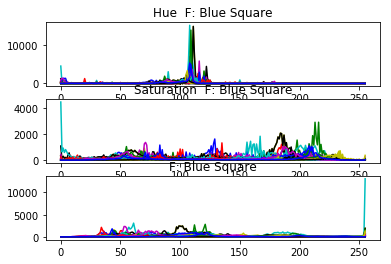

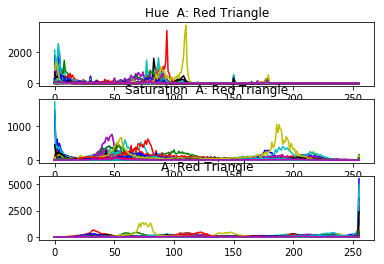

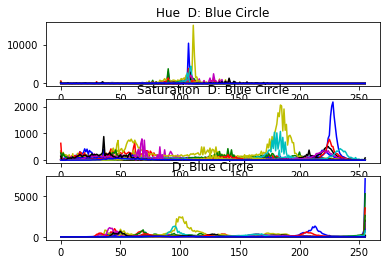

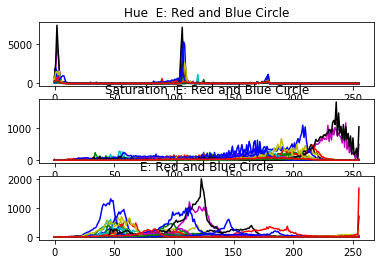

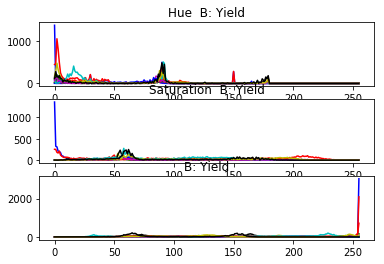

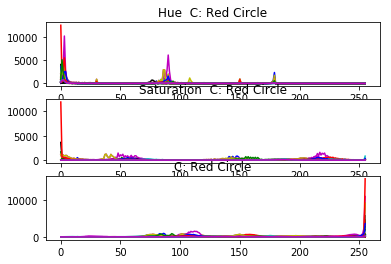

In [3]:
results_file_dir = "./results/"
if not os.path.exists(results_file_dir):
    os.makedirs(results_file_dir)

color_analysis(gt, mask_file_path=msk_train_dir, image_file_path=im_train_dir)
#red_test(gt, mask_file_path=mask_file_path, image_file_path=image_file_path)
color_segmentation_hsv(gt, mask_file_path=msk_train_dir, image_file_path=im_train_dir, results_file_path=results_file_dir)

# model Evaluation

In [4]:
from traffic_signs.evaluation.evaluation_funcs import performance_accumulation_window, performance_accumulation_pixel
from traffic_signs.evaluation.evaluation_funcs import performance_evaluation_pixel, performance_evaluation_window

In [31]:
pixelTP = 0
pixelFP = 0
pixelFN = 0
pixelTN = 0

for i, ann in enumerate(gt):
    image            = cv2.imread( im_train_dir  + ann[0] + ".jpg")
    true_msk_im      = cv2.imread( msk_train_dir + "mask." + ann[0] + ".png", 0) > 0
    predicted_msk_im = cv2.imread( os.path.join(results_file_dir,"mask." + ann[0] + ".png"), 0 ) > 0
    
    #cv2.imshow('true', true_msk_im * 255)
    #cv2.imshow('pred', predicted_msk_im * 255)

    [localPixelTP, localPixelFP, localPixelFN, localPixelTN] = performance_accumulation_pixel(predicted_msk_im, true_msk_im)
    
    pixelTP = pixelTP + localPixelTP
    pixelFP = pixelFP + localPixelFP
    pixelFN = pixelFN + localPixelFN
    pixelTN = pixelTN + localPixelTN
    
[pixel_precision, pixel_accuracy, pixel_specificity, pixel_sensitivity] = performance_evaluation_pixel(pixelTP, pixelFP, pixelFN, pixelTN)
    

print(pixel_precision)
print(pixel_accuracy)
print(pixel_specificity)
print(pixel_sensitivity)

0.1681473714687061
0.9872919617231483
0.9893674908483058
0.5022556752468689
